# Как выжить на титанике

---

Эта тетрадка научит тебя использовать pandas, numpy, строить графики в matplotlib и выживать при кораблекрушении.

Начнём!


* Клетки можно просто выполнять (выделить и ctrl+enter или shift+enter - чтобы сразу выделить следующую)
* По надобности их можно создавать ("плюсик" в панели наверху)
* В некоторых клетках нужно дописать код, что именно - пишется в комментариях рядом

## загрузим данные c Pandas

In [46]:
#подключим модуль Pandas. Он нужен, чтобы работать с данными
import pandas
import numpy as np

#считаем данные
data = pandas.DataFrame.from_csv("train.csv")

In [5]:
print "Hello"

Hello


In [50]:
#Данные - таблица, двумерный массив
data[:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Расшифровка колонок
* Survived - выжил ли человек
* Pclass - класс, которым человек путешествовал
* Name - имя(строка)
* Sex - пол, а не то, что ты подумал - строка male/female
* Age - возраст
* Sibsp - число родственников на корабле
* Parch - число родителей на корабле
* Ticket - билет (строка-шифр)
* Fare - сколько стоил билет
* Cabin - номер каюты, если есть
* Embarked - порт, в котором человек зашёл на борт
 * C = Cherbourg; Q = Queenstown; S = Southampton

В некоторых колонках встречается NaN - значит, что у данного человека данная колонка неизвестна (квест - найти их глазами в данных выше)

In [9]:
#размеры таблицы
print "len(data) = ",len(data)
print "data.shape = ",data.shape

len(data) =  891
data.shape =  (891, 11)


In [10]:
#вот так можно получить четвёртую строку таблицы, считая с нуля
print data.iloc[4]

Survived                           0
Pclass                             3
Name        Allen, Mr. William Henry
Sex                             male
Age                               35
SibSp                              0
Parch                              0
Ticket                        373450
Fare                            8.05
Cabin                            NaN
Embarked                           S
Name: 5, dtype: object


In [11]:
#первые 5 строк
print data[0:5]

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [12]:
#так можно получить второй столбец (считая с нуля)
#print data.icol(2)
#но проще - вот так:
print data["Name"]
#или даже так: data.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [13]:
#несколько колонок, несколько строк
data[["Sex","Pclass"]][5:10]

,Sex,Pclass
PassengerId,,
6,male,3
7,male,1
8,male,3
9,female,3
10,female,2


In [14]:
# А еще можно делать фильтры
data[data.Sex=='female'][data.Fare<20].head()

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


## Теперь сам
* выведи данные о 1, 13, 666 и последнем пассажире. Кто из них выжил?


* выведи данные о столбике "Survived" - выжившие.
* напиши программу, которая считает, сколько всего людей выжило и сколько всего людей было на корабле


! Обрати внимание, что в данных может быть мусор (NaN, пустые значения) ! 

Их можно найти и удалить. Подумай (или погугли), как это сделать в питоне

In [47]:
#<1,13, 666 и последний из пассажиров>
data.iloc[-1]

Survived                      0
Pclass                        3
Name        Dooley, Mr. Patrick
Sex                        male
Age                          32
SibSp                         0
Parch                         0
Ticket                   370376
Fare                       7.75
Cabin                       NaN
Embarked                      Q
Name: 891, dtype: object

In [ ]:
#столбик

In [19]:
survived = len(data[data.Survived == 1])#Посчитай количество выживших
assert np.allclose(survived, 342)

# Numpy и векторные операции

In [20]:
#загружаем np. Это быстрая библиотека для математики


#основная структура данных - массив
a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print ("a = ",a)
print ("b = ",b)

#математические и логические операции считаются для каждого элемента массива
print "a+1 =", a+1
print "a*2 =", a*2
print "a==2", a==2

#если в операции участвуют 2 массива, операции считаются для соответствующих пар
print "a+b =",a+b
print "a*b =",a*b
print "a.b =",a.dot(b)

('a = ', array([1, 2, 3, 4, 5]))
('b = ', array([5, 4, 3, 2, 1]))
a+1 = [2 3 4 5 6]
a*2 = [ 2  4  6  8 10]
a==2 [False  True False False False]
a+b = [6 6 6 6 6]
a*b = [5 8 9 8 5]
a.b = 35


In [21]:
#а теперь сам
print "Разность между a и b:", a-b #<твой код>
print "Квадраты элементов b:", b**2#<твой код>
print "Половины элементов массива a:", a/2#<твой код>
print "Половины произведений элементов массивов a и b:", a*b/2#<твой код>
print "Частное разности элементов a и единицы с квадратами b:", (a-1)/b**2#<твой код>

Разность между a и b: [-4 -2  0  2  4]
Квадраты элементов b: [25 16  9  4  1]
Половины элементов массива a: [0 1 1 2 2]
Половины произведений элементов массивов a и b: [2 4 4 4 2]
Частное разности элементов a и единицы с квадратами b: [0 0 0 0 4]


In [22]:
#а ещё в numpy есть много функций

print "np.sum(a) = ",np.sum(a)
print "np.min(a) = ", np.min(a)
print "np.argmin(b) = ", np.argmin(b) #индекс минимального элемента
print "np.max(a) = ", np.max(a)
print "np.argmax(b) = ", np.argmax(b) #индекс максимального
print "np.average(a) = ", np.average(a)
print "np.unique(['male','male','female','female','male']) = ",np.unique(['male','male','female','female','male'])
#и ещё много  всего ...


np.sum(a) =  15
np.min(a) =  1
np.argmin(b) =  4
np.max(a) =  5
np.argmax(b) =  0
np.average(a) =  3.0
np.unique(['male','male','female','female','male']) =  ['female' 'male']


In [29]:
#Точно так же работают многомерные массивы
c = np.zeros((3, 3))
d = np.arange(3*3*2).reshape((3, 3, 2))
e = np.random.random((3, 2))
#print c
print d
print 
print e
print 
print d+e

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]

[[ 0.08034152  0.03576268]
 [ 0.45418425  0.4568428 ]
 [ 0.26344273  0.98252388]]

[[[  0.08034152   1.03576268]
  [  2.45418425   3.4568428 ]
  [  4.26344273   5.98252388]]

 [[  6.08034152   7.03576268]
  [  8.45418425   9.4568428 ]
  [ 10.26344273  11.98252388]]

 [[ 12.08034152  13.03576268]
  [ 14.45418425  15.4568428 ]
  [ 16.26344273  17.98252388]]]


In [33]:
#print d.flatten()
#print d.reshape((2, 9))
print d
print np.moveaxis(d, (0, 1, 2), (0, 2, 1))

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]
[[[ 0  2  4]
  [ 1  3  5]]

 [[ 6  8 10]
  [ 7  9 11]]

 [[12 14 16]
  [13 15 17]]]


In [58]:
data.iloc[258]

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                 512.329
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object

In [71]:
# мини-квест:
# реши свою предыдущую задачу в 1-2 строчки с использованием numpy
#подсказка: если массив состоит из 0 и 1, то 
#сумма = количестно единичек 
#среднее значение = вероятность единички
pas_max = data.iloc[np.argmax(data["Fare"])-1]
pas_min = data.iloc[np.argmin(data["Fare"])-1]
print pas_max["Fare"], pas_max["Survived"]#<твой код>
print pas_min["Fare"], pas_min["Survived"]#<твой код>
#найди пассажира с (минимальной/максимальной) стоимостью билета. Сколько он заплатил? Выжил ли он?

print #<твой код>

#Сколько лет было самому (молодому\старому) пассажиру. Как его звали? Какого он пола?
print data.iloc[np.argmin(data["Age"])-1][["Name","Sex","Age"]] #<твой код>
print data.iloc[np.argmax(data["Age"])-1][["Name","Sex","Age"]] #<твой код>

512.3292 1
0.0 0

Name    Thomas, Master. Assad Alexander
Sex                                male
Age                                0.42
Name: 804, dtype: object
Name    Barkworth, Mr. Algernon Henry Wilson
Sex                                     male
Age                                       80
Name: 631, dtype: object


In [87]:
mean_age = np.average(data[~(np.isnan(data["Age"]))]["Age"])#Посчитай средний возраст людей на корабле (тут точно будет NaN)
assert np.allclose(mean_age, 29.69911764705882)

In [89]:
print "логические операции"

print a, b

print "a>2",a>2
print "np.logical_not(a>2) = ",np.logical_not(a>2)
print "np.logical_and(a>2,b>2) = ", np.logical_and(a>2,b>2)
print "np.logical_or(a>4,b<3) = ", np.logical_or(a>2,b<3)

print "\nили проще"
print "~(a>2) = ",~(a>2)  #как logical_not
print "(a>2)&(b>2) = ", (a>2)&(b>2) #как logical_and
print "(a>2)|(b<3) = ", (a>2)|(b<3)    #как logical_or


print "\n\nИндексация"

#индексация - выбираем эллементы из массима
print "a> 3 =",a>3
print "a[a>3] =", a[a>3]
print "np.where(a>3) =",np.where(a>3) #где в массиве лежат True (кортеж, в котором лежит массив)
print "a[np.where(a>3)] =",a[np.where(a>3)]

логические операции
[1 2 3 4 5] [5 4 3 2 1]
a>2 [False False  True  True  True]
np.logical_not(a>2) =  [ True  True False False False]
np.logical_and(a>2,b>2) =  [False False  True False False]
np.logical_or(a>4,b<3) =  [False False  True  True  True]

или проще
~(a>2) =  [ True  True False False False]
(a>2)&(b>2) =  [False False  True False False]
(a>2)|(b<3) =  [False False  True  True  True]


Индексация
a> 3 = [False False False  True  True]
a[a>3] = [4 5]
np.where(a>3) = (array([3, 4], dtype=int64),)
a[np.where(a>3)] = [4 5]


### теперь сам

Квесты
* 1) сколько всего классов и какие они? ("Pclass")
* 2) какая средняя стоимость билета в каждом классе?
* 3) в каком классе больше детей (< 18 лет)? 
* 4) все ли дети путешествуют с родителями?
* 5) Есть ли различия в названиях билетов("Ticket") в разных классах?

Бонусные сайд-квесты
* 1) какие бывают порты? ("Embarked")
* 2) Из какого порта больше пассажиров
* 3) В каком порту самые дорогие билеты?
* 4) В каком порту самые молодые девушки?
* 5) Есть ли различия в названиях билетов("Ticket") в разных портах?

In [101]:
#твой код
print len(np.unique(data[data.Pclass != np.nan]["Pclass"]))
#здесь

#тоже твой код

3


In [ ]:
mean_age = #Средний возраст девушек в порту Southampton (S)
assert np.allclose(mean_age, 27.771505376344088)
print "Correct"

In [ ]:
#Выдели в отдельные наборы мужчин и женщин
# за пол отвечает колонка "Sex", ("male","female")

men = #<твой код>
women = #<твой код>

#Кто с большей вероятностью выживет: мужчина или женщина?
print "P(выжил|мужчина) = ", #<твой код>
print "P(выжил|женщина) = ", #<твой код>

## битва полов:
* кто больше платил за билет?
* у кого больше вероятность, что он плавает с семьёй (в данных колонка "SibSp" - к-во родственников)
* кто в среднем моложе?
* кто ЧАЩЕ плавает ПЕРВЫМ классом? ("Pclass")

In [ ]:
print "Средняя цена для мужчин:", #<твой код>
print "Средняя цена для женщин:", #<твой код>

print "Вероятность, у мужчины на корабле семья"
print "Вероятность, у женщины на корабле семья"

print "Средний возраст мужчин:", #<твой код>
print "Средний возраст женщин:", #<твой код>


p_men = #Вероятность плавать первым классом у мужчин 
p_women = #Вероятность плавать первым классом у женщин
assert np.allclose(p_men, 0.21143847487)
assert np.allclose(p_women, 0.299363057325)
print "Вероятность плавать первым классом у мужчин:",p_men
print "Вероятность плавать первым классом у женщин:", p_women

## Бонус: насколько она быстрая, Гарри?
Испытаем numpy на скорость
* создадим 2 массива по 10^6 элементов
 * первый - числа от 0 до 1 000 000 не включая конец
 * второй - числа от 99 до 1 000 099 не включая конец
* посчитаем:
 * поэллементную сумму
 * поэллементное произведение
 * корень квадратный эллементов первого массива
 * сумму всех элементов первого массива (одно число)
 
* Сделаем это 3-мя способами
 * чистый python и списки
 * начинаем в python, преобразуем в numpy и 



In [ ]:
%%time
#эта штука считает время выполнения КЛЕТКИ (должна быть на первой строчке клетки)
#время печатается в конце (точное время - total )


#без numpy, чистый python
arr_1 = range(1000000)
arr_2 = range(99,1000099)


a_sum = []
a_prod = []
sqrt_a1 = []
for i in range(len(arr_1)):
    a_sum.append(arr_1[i]+arr_2[i])
    a_prod.append(arr_1[i]*arr_2[i])
    a_sum.append(arr_1[i]**0.5)
    
#сумма всех элементов arr_1
arr_1_sum = sum(arr_1)


In [ ]:
%%time

#с numpy, преобразуя из list
arr_1 = range(1000000)
arr_2 = range(99,1000099)

arr_1, arr_2 = np.array(arr_1) , np.array(arr_2)


a_sum = arr_1 + arr_2
a_prod = arr_1*arr_2
sqrt_a1 = arr_1**.5


In [ ]:
%%time
# чистый numpy
arr_1 = np.arange(1000000)
arr_2 = np.arange(99,1000099)

a_sum = arr_1 + arr_2
a_prod = arr_1*arr_2
sqrt_a1 = arr_1**.5

# Графики и matplotlib
Как рисовать красивые картинки и издеваться над любителями MS Excel

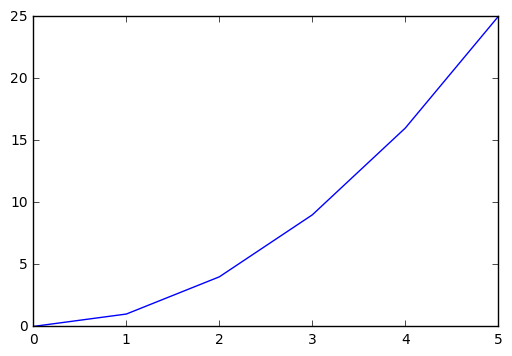

In [103]:
#загрузим библиотеку
import matplotlib.pyplot as plt #загрузить библиотеку matplotlib.pyplot под именем plt
%matplotlib inline

#линии
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25])

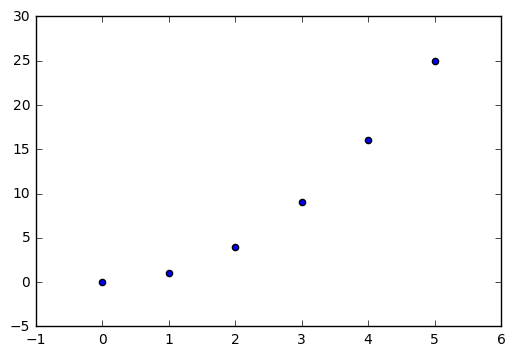

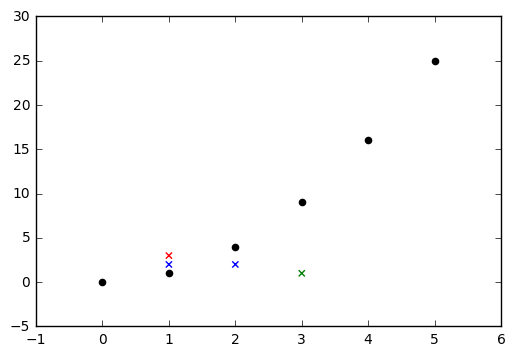

In [104]:
#точки
plt.scatter([0,1,2,3,4,5],[0,1,4,9,16,25])

plt.show()#после этой функции всё уже построенное отрисуется и начнётся новый график

#если не писать plt.show() между графиками, они накладываются
plt.scatter([1,1,2,3],[3,2,2,1],c = ["red","blue","blue","green"],marker = "x")
plt.scatter([0,1,2,3,4,5],[0,1,4,9,16,25],c = "black")
plt.show()

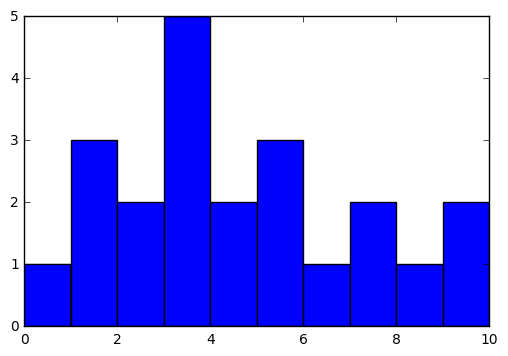

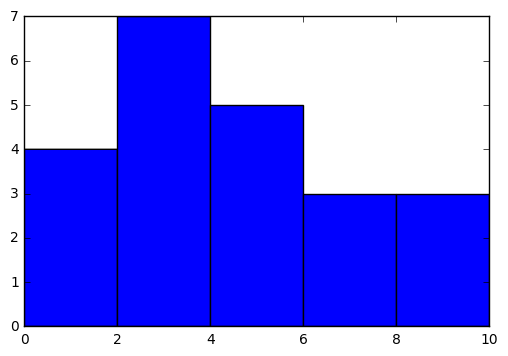

In [105]:
#гистограмма
plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10])
plt.show()


plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10],bins = 5)
plt.show()

## Виды графиков
 - plot - линии
 - scatter - точки
 - hist - горизонтальные штуки (бины)

In [ ]:
#Построй гистограмму возрастов, гистограмму цен.

#<ваш код>

#Бонус - узнай, как строить 2D-гистограму возрастов И цен. 

In [ ]:
#Постройте график из точек x=возраст, y=цена билета
#цвет - пол

#<ваш код>

# Битва с финальным боссом

При помощи интуиции, граффиков и вычислений попробуй выделить по признакам группу людей,
в которой почти все выжили. 

Признаки - выражения вида:
* [колонка] равно [значение] (пол = женский)
* [математическое выражение] >, <, >= или <=  [значение]  (возраст старше 18 лет) (количество родственников минус родителей больше 1)
* [колонка с именем] - [утверждение про имя]  (имя содержит "Mr." и длинее 5 букв)

Признаки могут использоваться через И и ИЛИ.

(и только их. НЕ, импликация, XOR, эквивалентность, штрих Шифера и стрелка Пирса идут лесом)

Например, все [старше 30 лет] И [из порта C] И ([родственников 0] ИЛИ [первый класс]) - это 4 признака

При этом:
* Чем больше выживших людей(количество, а не доля), тем лучше;
* В группе обязательно должны выжить более 80% людей;
* Желательно использовать не более 5 признаков;
 * Если нашёл более 1 такой группы - перечисли несколько;
* Гипотеза должна подтверждаться запускабельным кодом, 
 * который считает число людей и шанс выжить;
 * высший пилотаж - заправить это красивыми граффиками по теме;

Напутствие - возможно, будет полезно сначала изучить данные, посмотреть на графики и обусдить идеи, а потом бросаться лихорадочно пробовать всё подряд.

In [ ]:
#предварительные вычисления для графиков

In [ ]:
#пример для [старше 30 лет] И [из порта C] И ([родственников 0] ИЛИ [первый класс])

data_with_age = data[~np.isnan(data.Age)]

age_and_port = np.logical_and(data_with_age.Age > 30,data_with_age.Embarked == "C")

#родственников на борту 0 или в первом классе
sibsp_or_class = np.logical_or(data_with_age.SibSp ==0,data_with_age.Pclass ==1)

#всё вместе
group_indexer = np.logical_and(age_and_port,sibsp_or_class)

#группа. Замените этот код на свою группу.
group = data_with_age[group_indexer]


In [ ]:
print "Количество человек:",len(group)
print "Количество выживших:", len(group[group.Survived == True])
p_survived = np.average(group.Survived)
print "Вероятность выжить:", p_survived
print "Достаточно выживших:", p_survived > 0.8

In [ ]:
# Если ещё не устал - аналогично выдели группы людей, где все погибли

[руководства по библиотекам]

  * [NumPy](http://www.np.org/)
    - [руководство для пользователей Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [пример работы с данными при помощи pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — эмуляция функционала графопостроений в Matlab
    - [галерея примеров](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)